**IMPLEMENTAÇÃO DO ALGORITMO DE BUSCA POR VIZINHANÇA**

*   Resolução do Problema do Caixeiro Viajante (Travelling Salesman Problem - TSP)






Caminho ótimo: ['B', 'A', 'C', 'D']
Custo total: 80


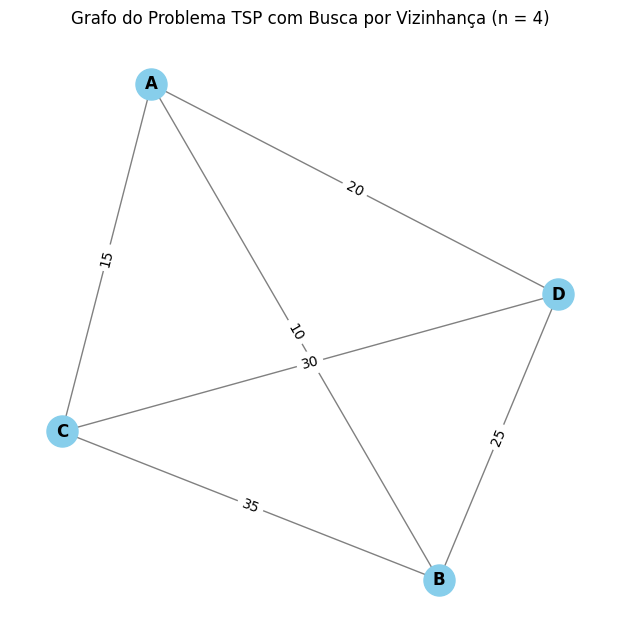

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular o custo(distância) entre duas cidades consecutivas
def calcular_custo(caminho, distancias):
    custo = 0
    for i in range(len(caminho) - 1):                   # Iterando por todas as cidades, exceto a última
        custo += distancias[caminho[i]][caminho[i+1]]

    custo += distancias[caminho[-1]][caminho[0]]        # Distância da última cidade visitada até a cidade inicial
    return custo

# Função para trocar duas cidades de lugar (2-opt)
def troca_2opt(caminho, i, j):
    novo_caminho = caminho[:i] + caminho[i:j+1][::-1] + caminho[j+1:]
    return novo_caminho

# Busca por Vizinhança (TSP)
def busca_por_vizinhanca(distancias, n):

    caminho_atual = [0, 1, 2, 3]          # Solução inicial fixa (cidades A, B, C, D)
    custo_atual = calcular_custo(caminho_atual, distancias)

    melhor_caminho = caminho_atual
    melhor_custo = custo_atual

    melhorando = True
    while melhorando:
        melhorando = False
        # Explorando as vizinhanças trocando duas cidades
        for i in range(n):
            for j in range(i + 1, n):
                novo_caminho = troca_2opt(caminho_atual, i, j)
                novo_custo = calcular_custo(novo_caminho, distancias)

                if novo_custo < melhor_custo:
                    melhor_custo = novo_custo
                    melhor_caminho = novo_caminho
                    melhorando = True
                    break
            if melhorando:
                break

        caminho_atual = melhor_caminho

    cidades = ['A', 'B', 'C', 'D']

    melhor_caminho_cidades = []
    for i in range(0, len(melhor_caminho)):
      melhor_caminho_cidades.append(cidades[melhor_caminho[i]])     # Conversão da solução de números para letras


    return melhor_caminho_cidades, melhor_custo





# Matriz de distâncias (matriz de adjacência)
distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

n = 4

# Busca por Vizinhança para n = 4
caminho, custo = busca_por_vizinhanca(distancias, n)

# Resultado
print(f"Caminho ótimo: {caminho}")
print(f"Custo total: {custo}")

# Criando o grafo com NetworkX
G = nx.Graph()

# Adicionando as cidades como vértices
cidades = ['A', 'B', 'C', 'D']
for i, cidade in enumerate(cidades):
    G.add_node(cidade)

# Adicionando as arestas como as distâncias entre as cidades
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(cidades[i], cidades[j], weight=distancias[i][j])

# Plotando o grafo
pos = nx.spring_layout(G)  # Layout para posicionar os vértices
plt.figure(figsize=(6,6))

# Desenhando as cidades como vértices
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")

# Desenhando as arestas com pesos (distâncias/custos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Grafo do Problema TSP com Busca por Vizinhança (n = 4)")
plt.show()


Caminho ótimo: ['B', 'E', 'A', 'C', 'D', 'G', 'F', 'H']
Custo total: 175


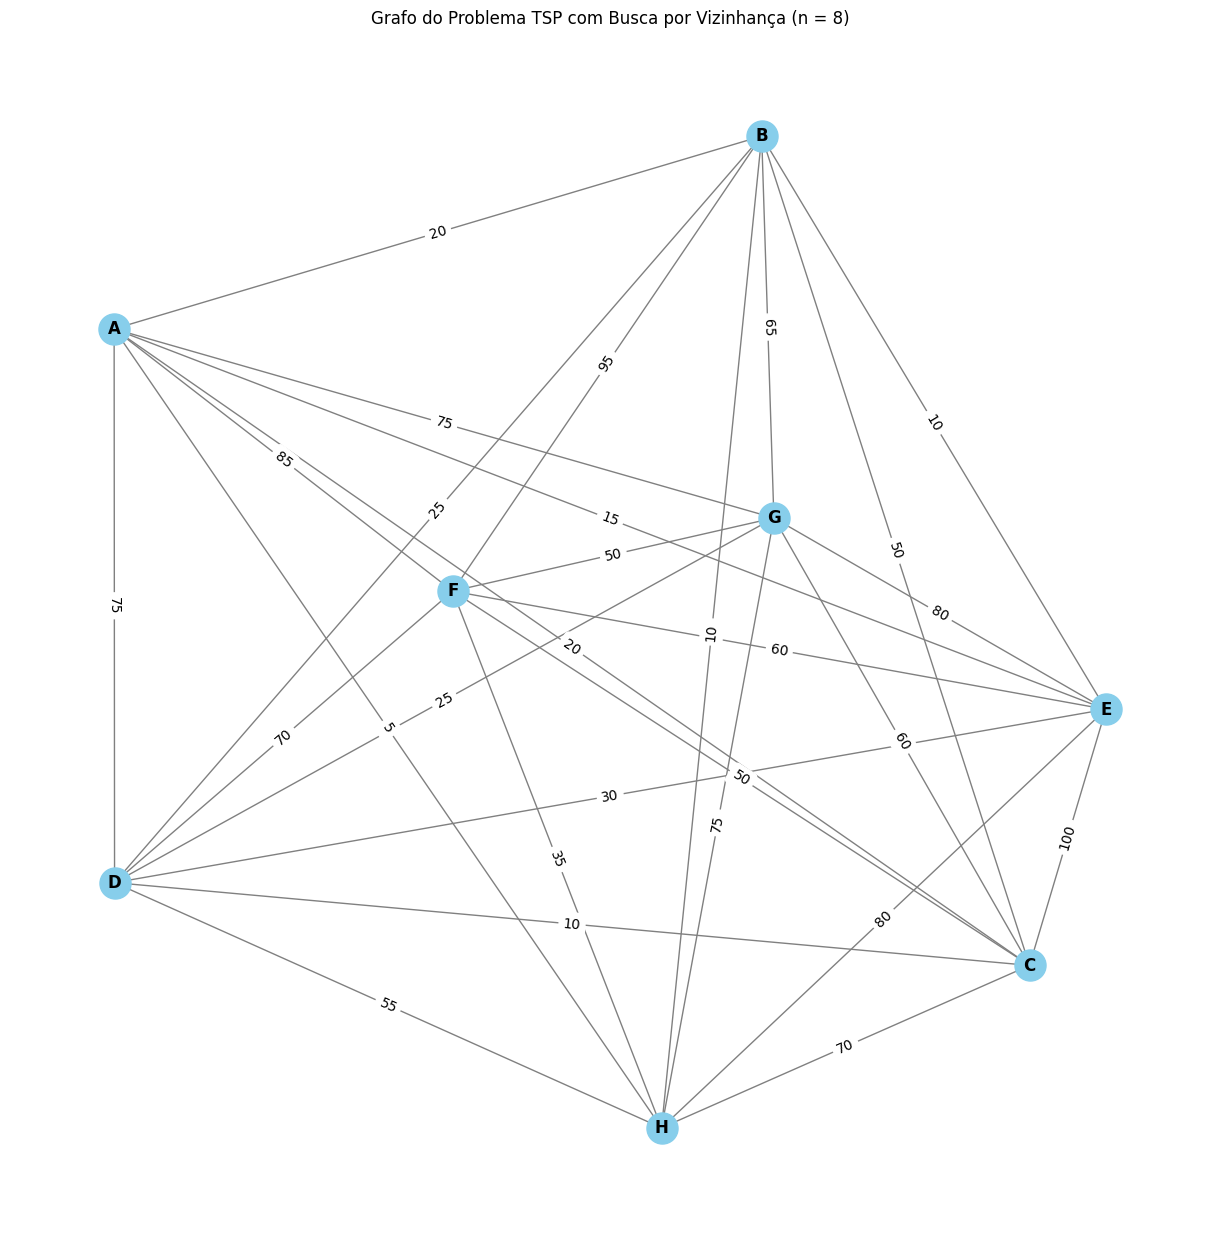

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular o custo(distância) entre duas cidades consecutivas
def calcular_custo(caminho, distancias):
    custo = 0
    for i in range(len(caminho) - 1):                   # Iterando por todas as cidades, exceto a última
        custo += distancias[caminho[i]][caminho[i+1]]

    custo += distancias[caminho[-1]][caminho[0]]        # Distância da última cidade visitada até a cidade inicial
    return custo

# Função para trocar duas cidades de lugar (2-opt)
def troca_2opt(caminho, i, j):
    novo_caminho = caminho[:i] + caminho[i:j+1][::-1] + caminho[j+1:]
    return novo_caminho

# Busca por Vizinhança (TSP)
def busca_por_vizinhanca(distancias, n):

    caminho_atual = [0, 3, 2, 1, 4 , 6 , 5 ,7 ]                # Solução inicial fixa ['A', 'D', 'C', 'B', 'E', 'G', 'F', 'H' ]
    custo_atual = calcular_custo(caminho_atual, distancias)

    melhor_caminho = caminho_atual
    melhor_custo = custo_atual

    melhorando = True
    while melhorando:
        melhorando = False
        # Explorando as vizinhanças trocando duas cidades
        for i in range(n):
            for j in range(i + 1, n):
                novo_caminho = troca_2opt(caminho_atual, i, j)
                novo_custo = calcular_custo(novo_caminho, distancias)

                if novo_custo < melhor_custo:
                    melhor_custo = novo_custo
                    melhor_caminho = novo_caminho
                    melhorando = True
                    break
            if melhorando:
                break

        caminho_atual = melhor_caminho

    cidades = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

    melhor_caminho_cidades = []
    for i in range(0, len(melhor_caminho)):
      melhor_caminho_cidades.append(cidades[melhor_caminho[i]])           # Conversão da solução de números para letras


    return melhor_caminho_cidades, melhor_custo





# Matriz de distâncias (matriz de adjacência)
distancias = [
    [0, 20, 20, 75, 15, 85, 75, 5],
    [20, 0, 50, 25, 10, 95, 65, 10],
    [20, 50, 0, 10, 100, 50, 60, 70],
    [75, 25, 10, 0, 30, 70, 25, 55],
    [15, 10, 100, 30, 0, 60, 80, 80],
    [85, 95, 50, 70, 60, 0, 50, 35],
    [75, 65, 60, 25, 80, 50, 0, 75],
    [5, 10, 70, 55, 80, 35, 75, 0]
]

n = 8

# Busca por Vizinhança para n = 8
caminho, custo = busca_por_vizinhanca(distancias, n)

# Resultado
print(f"Caminho ótimo: {caminho}")
print(f"Custo total: {custo}")

# Criando o grafo com NetworkX
G = nx.Graph()

# Adicionando as cidades como vértices
cidades = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for i, cidade in enumerate(cidades):
    G.add_node(cidade)

# Adicionando as arestas com as distâncias entre as cidades
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(cidades[i], cidades[j], weight=distancias[i][j])

# Plotando o grafo
pos = nx.spring_layout(G)  # Layout para posicionar os vértices
plt.figure(figsize=(12,12))

# Desenhando as cidades como vértices
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")

# Desenhando as arestas com pesos (distâncias/custos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Grafo do Problema TSP com Busca por Vizinhança (n = 8)")
plt.show()
